In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
##   特征和标签获取
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])



In [3]:
## 学习率   每批的数量   模型的参数shape
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
#模型
model_output = tf.add(tf.matmul(x_data, A), b)




In [5]:
#损失函数    优化器的选择
loss = tf.reduce_mean(tf.square(y_target - model_output))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_opt.minimize(loss)


In [6]:
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={
        x_data: rand_x,
        y_target: rand_y
    })
    temp_loss = sess.run(loss, feed_dict={
        x_data:rand_x,
        y_target:rand_y
    })
    loss_vec.append(temp_loss)
    if((i + 1) % 25 == 0):
        print('Step #'+str(i+1) + ' A = ' + str(sess.run(A)) + ' b = '
              + str(sess.run(b)))
        print('Loss = '+ str(temp_loss))


Step #25 A = [[2.010778]] b = [[3.1108837]]
Loss = 0.75214875
Step #50 A = [[1.5831321]] b = [[3.7552142]]
Loss = 0.45873237
Step #75 A = [[1.3130196]] b = [[4.206024]]
Loss = 0.24643028
Step #100 A = [[1.1580222]] b = [[4.445836]]
Loss = 0.28904408


In [7]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
    best_fit.append(slope*i + y_intercept)


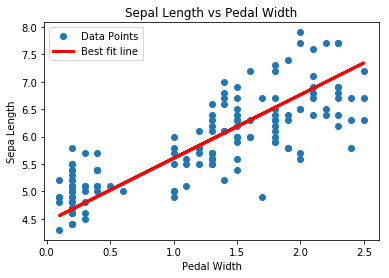

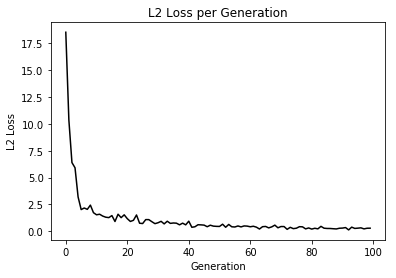

In [8]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line',linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepa Length')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()